In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.metrics import precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

import visuals as vs

import time

/home/yifan/anaconda3/envs/dragons2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
sklearn.__version__

'0.17.1'

In [2]:
data=pd.read_csv('census.csv')

n_records = data.shape[0]
income_raw = data['income']
features_raw = data.drop('income', axis = 1)


skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

features = pd.get_dummies(features_raw)
# Encode the 'income_raw' data to numerical values
income=income_raw.apply(lambda x:0 if x=='<=50K'  else 1)
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

In [4]:
#Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set 
    '''
    results = {}
    # Fit the learner to the training data using sample_size
    start = time.time() # Get start time
    
    # Take the first n=sample_size data points for training
    X_train_sample=X_train.sample(sample_size)
    y_train_sample=y_train[X_train_sample.index]

    learner.fit(X_train_sample, y_train_sample)
    end = time.time() # Get end time

    # Calculate the training time
#     results['train_time'] = "{%0.5f} seconds" %(end-start)
    results['train_time'] = end-start

    
    # Get the predictions on the test set,
    # then get predictions on the first 300 training samples
    start = time.time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train_sample)
    end = time.time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train_sample.head(300), predictions_train[0:300])
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train_sample.head(300), predictions_train[0:300],beta=0.5)
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5) 
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
    
    # Return the results
    return results

# 07/02/2017

In [3]:
clf=GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=4, random_state=111)
# clf=RandomForestClassifier()
clf.fit(X_train, y_train)
clf_predictions = clf.predict(X_test)

print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, clf_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, clf_predictions, beta = 0.5))

Final accuracy score on the testing data: 0.8714
Final F-score on the testing data: 0.7538


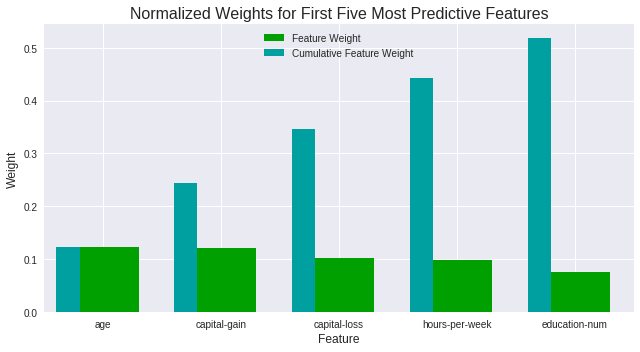

In [4]:
importances=clf.feature_importances_
vs.feature_plot(importances, X_train, y_train)

In [18]:
clf.feature_importances_.shape

(103,)

In [19]:
clf.feature_importances_

array([ 0.12343053,  0.07520111,  0.12118224,  0.10132616,  0.09731191,
        0.0108365 ,  0.01675291,  0.00887392,  0.00744472,  0.0186067 ,
        0.00938562,  0.00121785,  0.00464141,  0.00165539,  0.0009882 ,
        0.00070966,  0.00163709,  0.00287821,  0.        ,  0.00533039,
        0.00292501,  0.00971109,  0.00136852,  0.00294329,  0.0052986 ,
        0.        ,  0.00830778,  0.00349207,  0.00223546,  0.00556717,
        0.06943847,  0.00643251,  0.00433102,  0.00240677,  0.00445358,
        0.00516258,  0.        ,  0.00258056,  0.01406879,  0.01077432,
        0.00682774,  0.00517159,  0.01201955,  0.00053514,  0.01397983,
        0.00721121,  0.01295683,  0.00790494,  0.0044888 ,  0.01314142,
        0.00312157,  0.00238634,  0.00247963,  0.00310839,  0.02193179,
        0.00160905,  0.0035255 ,  0.00164277,  0.        ,  0.00725852,
        0.00738548,  0.00728994,  0.00297266,  0.00846265,  0.00373074,
        0.00215158,  0.00107063,  0.        ,  0.        ,  0.  

['age' 'capital-gain' 'capital-loss' 'hours-per-week' 'education-num'
 'marital-status_ Married-civ-spouse' 'relationship_ Wife'
 'workclass_ Self-emp-not-inc' 'workclass_ Local-gov'
 'occupation_ Exec-managerial']
[ 0.12343053  0.12118224  0.10132616  0.09731191  0.07520111  0.06943847
  0.02193179  0.0186067   0.01675291  0.01406879]


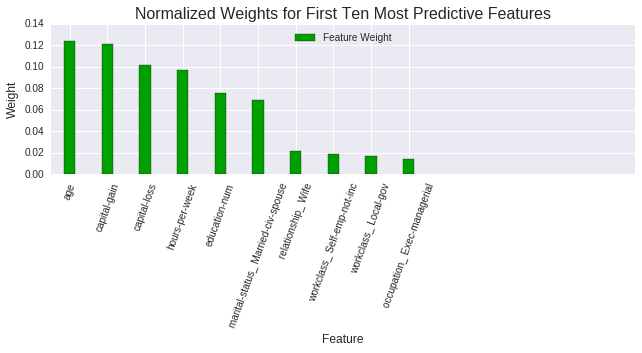

In [70]:
def feature_plot_10(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]
    print(columns)
    print(values)
    
    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    
    plt.title("Normalized Weights for First Ten Most Predictive Features", fontsize = 16)
    
    plt.bar(np.arange(10), values, width = 0.3, align="center", color = '#00A000', \
          label = "Feature Weight")
    
#     plt.bar(np.arange(10) - 0.25, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
#           label = "Cumulative Feature Weight")
    
    plt.xticks(np.arange(10), columns, rotation=70)
    plt.xlim((-0.5, 15))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  
    
feature_plot_10(importances, X_train, y_train)

In [ ]:
X_train['education-num'].corr(X_train['oc'])

<Container object of 10 artists>

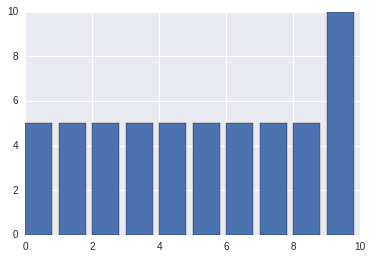

In [61]:
v=[5,5,5,5,5,5,5,5,5,10]
n=np.arange(10)
plt.bar(n, v)


# 06/02/2017

In [6]:
start = time.time()
samples_10 = np.int(X_train.shape[0]*0.1)
# samples_100 = np.int(X_train.shape[0])

X_train_sample=X_train.sample(samples_10,random_state=111)
y_train_sample=y_train[X_train_sample.index]

skf = StratifiedKFold(y_train_sample ,n_folds=5, random_state=111)

clf= GradientBoostingClassifier(random_state=111)
fscorer=make_scorer(fbeta_score, beta=0.5)
parameters={'learning_rate':[0.2, 0.1, 0.05]}
#             'n_estimators':[ 80, 100, 120,],
#             'max_depth':[3,4,5]}

grid=GridSearchCV(estimator=clf, param_grid=parameters, scoring=fscorer, cv=5, n_jobs=-1)

grid_fit= grid.fit(X_train_sample, y_train_sample)
# print grid.best_estimator_


end = time.time() 
print('best score is {:0.6f}'.format(grid_fit.best_score_))
print('best parameters is: ', grid_fit.best_params_)
print('this take {:0.4f} seconds'.format(end-start))
# print('this take )

best score is 0.696064
('best parameters is: ', {'learning_rate': 0.1})
this take 1.9710 seconds


In [90]:
start = time.time()
samples_10 = np.int(X_train.shape[0]*0.1)
# samples_100 = np.int(X_train.shape[0])

X_train_sample=X_train.sample(samples_10,random_state=111)
y_train_sample=y_train[X_train_sample.index]

skf = StratifiedKFold(y_train_sample ,n_folds=5, random_state=111)

clf= GradientBoostingClassifier(random_state=111)
fscorer=make_scorer(fbeta_score, beta=0.5)
parameters={'learning_rate':[0.2, 0.1, 0.05]}
#             'n_estimators':[ 80, 100, 120,],
#             'max_depth':[3,4,5]}

grid=GridSearchCV(estimator=clf, param_grid=parameters, scoring=fscorer, cv=5, n_jobs=-1)

grid_fit= grid.fit(X_train_sample, y_train_sample)
# print grid.best_estimator_


end = time.time() 
print('best score is {:0.6f}'.format(grid_fit.best_score_))
print('best parameters is: ', grid_fit.best_params_)
print('this take {:0.4f} seconds'.format(end-start))
# print('this take )

best score is 0.696064
('best parameters is: ', {'learning_rate': 0.1})
this take 3.0248 seconds


In [79]:
start = time.time()


skf = StratifiedKFold(y_train ,n_folds=5, random_state=111)

clf= GradientBoostingClassifier(random_state=111)
fscorer=make_scorer(fbeta_score, beta=0.5)

parameters={'learning_rate':[0.2, 0.1, 0.05],
            'n_estimators':[ 80, 100, 120,],
            'max_depth':[3,4,5]}

grid=GridSearchCV(estimator=clf, param_grid=parameters, scoring=fscorer, cv=skf, n_jobs=-1)

grid = grid.fit(X_train, y_train)
# print grid.best_estimator_


end = time.time() 
print('best score is {:0.6f}'.format(grid.best_score_))
print('best parameters is: ', grid.best_params_)
print('this take {:0.4f} seconds'.format(end-start))

best score is 0.755255
('best parameters is: ', {'n_estimators': 100, 'learning_rate': 0.2, 'max_depth': 4})
this take 634.6270 seconds


In [5]:
clf_b=GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=4, random_state=111)
clf_b.fit(X_train, y_train)
clf_b_predictions = clf_b.predict(X_test)

print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, clf_b_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, clf_b_predictions, beta = 0.5))

Final accuracy score on the testing data: 0.8714
Final F-score on the testing data: 0.7538


In [71]:
12.1-2.5


9.6

In [82]:
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

In [83]:
# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8714
Final F-score on the testing data: 0.7538


In [ ]:
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]

In [87]:
print('best parameters is: ', grid.best_params_)
print('------')

('best parameters is: ', {'n_estimators': 100, 'learning_rate': 0.2, 'max_depth': 4})
----


In [12]:
samples_10 = np.int(X_train.shape[0]*0.1)
X_train_sample=X_train.sample(samples_10)
y_train_sample=y_train[X_train_sample.index]
skf = StratifiedKFold(y_train_sample ,n_folds=5, random_state=111)

In [22]:
label=[0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0, 1, 0, 0]
cv_sets = ShuffleSplit(len(label), n_iter = 5, test_size = 0.40, random_state = 0)
for train, test in cv_sets:
    print train, test


[ 4  2  5 14  9  7 16 11  3  0 15 12] [18  1 19  8 10 17  6 13]
[10  0  3  4 15  8 13  9  5 14  7  6] [11  1 18 17  2 12 19 16]
[ 3 17  4 10 16 18  9  1  0  7 14 19] [15 13 12  5 11  2  8  6]
[14 16 11 10  9 15  1 19  8  6  5  4] [18  0 13  2  3 17  7 12]
[15 16  6 13 11  4 10  9 12  3 14  0] [ 7  1  2 19  5 18  8 17]


In [27]:
label=[0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0, 1, 0, 0]
skf=StratifiedKFold(label, n_folds=5, random_state=111)
for train, test in skf:
    print train, test


[ 4  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3 5]
[ 0  1  2  3  5  9 11 12 13 14 15 16 17 18 19] [ 4  6  7  8 10]
[ 0  1  2  3  4  5  6  7  8 10 14 15 16 17 18 19] [ 9 11 12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 17 18 19] [14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17 18 19]


In [25]:
len(label)

20

In [28]:
GridSearchCV?

# 04/02/2017 - Initial Model Evaluation

In [16]:
# Create naive prediction
naive_pred=pd.Series(np.ones(n_records), name='Naive_Prediction')

# Calculate accuracy
accuracy = np.float64((naive_pred==income).sum())/n_records

# Calculate F-score using the formula above for beta = 0.5
# the following calculation assume the postive label is 1 i.e. income>50000, in this binary classification scenario 
# the fscore equal to the fscore for the true positive class

# denote the following notion:
# tp1: true positive for positive label 
# fp1: false positive for positive label
# fn1: false negative for positive label 

tp1=income.loc[income==1].shape[0] #this equates to real total of people with income>50000
fp1=income.loc[income==0].shape[0] #this equates to real total of people with income<=50000
fn1=0                              #this is zero, since the naive prediction predict all people with income>50000  
beta=0.5

precision=float(tp1)/(tp1+fp1) 
recall=float(tp1)/(tp1+fn1)

fscore = (1+beta**2)*precision*recall/((beta**2*precision)+recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Initialize the three models
clf_A = LogisticRegression()
clf_B = SGDClassifier()
clf_C = GradientBoostingClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = np.int(X_train.shape[0]*0.01)
samples_10 = np.int(X_train.shape[0]*0.1)
samples_100 = np.int(X_train.shape[0])

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)


LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


### test 2

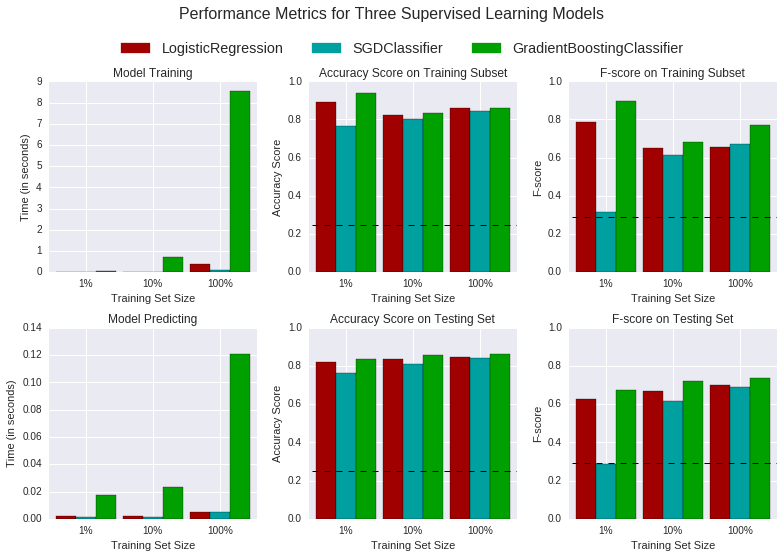

In [29]:
vs.evaluate(results, accuracy, fscore)

In [30]:
# The following information is printed out to show the numerical data, in order to aid the discussion for Question 3.
# explicitily print out the modelling time, training time, accuracy and f-score for test set with all training data

print('Training time while training on all train data')
print('Training time for Logistic Regression is {0:5f}'.format(results['LogisticRegression'][2]['train_time']))
print('Training time for SGD is {0:5f}'.format(results['SGDClassifier'][2]['train_time']))
print('Training time for Graident Boosting is {0:5f}'.format(results['GradientBoostingClassifier'][2]['train_time']))

print #output a new line
print('Prediction time while training on all train data')
print('Prediction time for Logistic Regression is {0:5f}'.format(results['LogisticRegression'][2]['pred_time']))
print('Prediction time for SGD is {0:5f}'.format(results['SGDClassifier'][2]['pred_time']))
print('Prediction time for Graident Boosting is {0:5f}'.format(results['GradientBoostingClassifier'][2]['pred_time']))

print #output a new line
print('Accuracy for test data while training on all train data')
print('Acc_test for Logistic Regression is {0:5f}'.format(results['LogisticRegression'][2]['acc_test']))
print('Acc_test for SGD is {0:5f}'.format(results['SGDClassifier'][2]['acc_test']))
print('Acc_test for Graident Boosting is {0:5f}'.format(results['GradientBoostingClassifier'][2]['acc_test']))

print #output a new line
print('F-Score for test data while training on all train data')
print('F-Score for Logistic Regression is {0:5f}'.format(results['LogisticRegression'][2]['f_test']))
print('F-Score for SGD is {0:5f}'.format(results['SGDClassifier'][2]['f_test']))
print('F-Score for Graident Boosting is {0:5f}'.format(results['GradientBoostingClassifier'][2]['f_test']))


Training time while training on all train data
Training time for Logistic Regression is 0.401807
Training time for SGD is 0.090450
Training time for Graident Boosting is 8.521303

Prediction time while training on all train data
Prediction time for Logistic Regression is 0.004914
Prediction time for SGD is 0.004711
Prediction time for Graident Boosting is 0.120649

Accuracy for test data while training on all train data
Acc_test for Logistic Regression is 0.848314
Acc_test for SGD is 0.843449
Acc_test for Graident Boosting is 0.863018

F-Score for test data while training on all train data
F-Score for Logistic Regression is 0.699293
F-Score for SGD is 0.689431
F-Score for Graident Boosting is 0.739534


### test 1

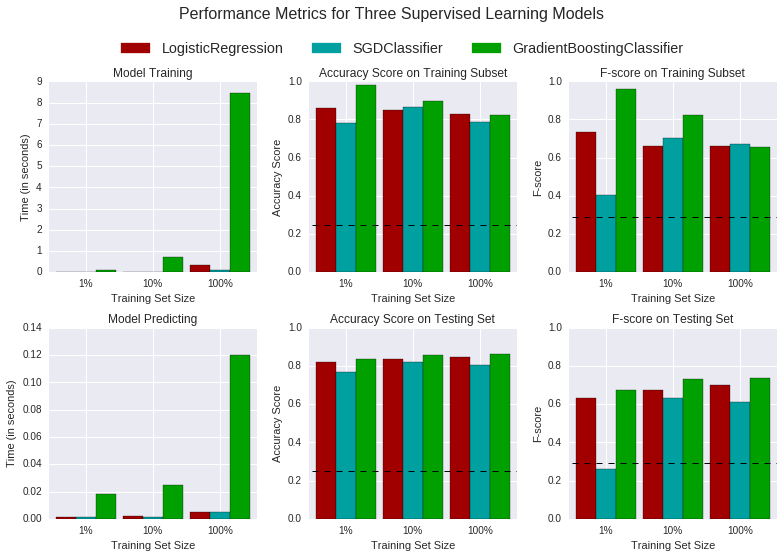

In [18]:
vs.evaluate(results, accuracy, fscore)

In [27]:
for k, learner in enumerate(results.keys()):
#     print k, learner
    print('f_test', results[learner][1]['f_test'])
#     print('acc_test', results[learner][2]['acc_test'])

('f_test', 0.67236214357039825)
('f_test', 0.63535513614752914)
('f_test', 0.73292615213770129)


In [14]:
for k, learner in enumerate(results.keys()):
#     print k, learner
    for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
        print j, metric
        for i in np.arange(3):
            print results[learner][i][metric]

0 train_time
{0.00723} seconds
{0.02993} seconds
{0.38094} seconds
1 acc_train
0.85
0.846666666667
0.823333333333
2 f_train
0.698924731183
0.704022988506
0.603174603175
3 pred_time
{0.00143} seconds
{0.00242} seconds
{0.00553} seconds
4 acc_test
0.816030956329
0.8362631288
0.848313985627
5 f_test
0.621853898097
0.670151594354
0.699293323489
0 train_time
{0.00542} seconds
{0.01446} seconds
{0.11473} seconds
1 acc_train
0.85
0.793333333333
0.873333333333
2 f_train
0.679611650485
0.428571428571
0.706666666667
3 pred_time
{0.00141} seconds
{0.00174} seconds
{0.00502} seconds
4 acc_test
0.777888336097
0.804311774461
0.83637368712
5 f_test
0.546578366446
0.569377990431
0.662110209312
0 train_time
{0.08099} seconds
{0.67273} seconds
{8.58063} seconds
1 acc_train
0.963333333333
0.866666666667
0.863333333333
2 f_train
0.9375
0.707395498392
0.775862068966
3 pred_time
{0.02057} seconds
{0.02311} seconds
{0.12038} seconds
4 acc_test
0.837368711996
0.859259259259
0.863018242123
5 f_test
0.669629774

In [6]:
learner1=LogisticRegression()
learner2=SGDClassifier()
learner3=GradientBoostingClassifier()

sample_size=300

results=train_predict(learner1, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner2, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner3, sample_size, X_train, y_train, X_test, y_test)
print(results)

LogisticRegression trained on 300 samples.
{'pred_time': '{0.00243} seconds', 'f_test': '{0.56277}', 'train_time': '{0.00819} seconds', 'acc_train': '{0.88333}', 'acc_test': '{0.78242}', 'f_train': '{0.80332}'}
SGDClassifier trained on 300 samples.
{'pred_time': '{0.00128} seconds', 'f_test': '{0.57789}', 'train_time': '{0.00430} seconds', 'acc_train': '{0.86667}', 'acc_test': '{0.80431}', 'f_train': '{0.77093}'}
GradientBoostingClassifier trained on 300 samples.
{'pred_time': '{0.01743} seconds', 'f_test': '{0.63349}', 'train_time': '{0.07487} seconds', 'acc_train': '{0.97667}', 'acc_test': '{0.82101}', 'f_train': '{0.95960}'}


# 21/01/2017 - model application

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


In [6]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    results = {}
    # Fit the learner to the training data using sample_size
    start = time.time() # Get start time
    X_train_sample=X_train.sample(sample_size)
    y_train_sample=y_train[X_train_sample.index]
    learner.fit(X_train_sample, y_train_sample)
    end = time.time() # Get end time

    # Calculate the training time
    results['train_time'] = "{%0.5f} seconds" %(end-start)
    # Get the predictions on the test set,
    # then get predictions on the first 300 training samples
    start = time.time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train_sample)
    end = time.time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = "{%0.5f} seconds" %(end-start)
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train_sample.head(300), predictions_train[0:300])
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train_sample.head(300), predictions_train[0:300],beta=0.5)
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)    
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
    
    # Return the results
    return results

In [4]:
learner1=LogisticRegression()
learner2=DecisionTreeClassifier()
learner3=RandomForestClassifier()
learner4=GradientBoostingClassifier()
learner5=AdaBoostClassifier()
learner6=SVC()
learner7=KNeighborsClassifier()
learner8=SGDClassifier()

sample_size=5000

results=train_predict(learner1, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner2, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner3, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner4, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner5, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner6, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner7, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner8, sample_size, X_train, y_train, X_test, y_test)
print(results)


# results=train_predict(learner, 10000, X_train, y_train, X_test, y_test)
# print(results)

# results=train_predict(learner, 15000, X_train, y_train, X_test, y_test)
# print(results)

# results=train_predict(learner, 20000, X_train, y_train, X_test, y_test)
# print(results)




LogisticRegression trained on 5000 samples.
{'pred_time': '{0.03328} seconds', 'f_test': 0.68164383561643838, 'train_time': '{0.04290} seconds', 'acc_train': 0.83999999999999997, 'acc_test': 0.84002211166390273, 'f_train': 0.65068493150684925}
DecisionTreeClassifier trained on 5000 samples.
{'pred_time': '{0.00356} seconds', 'f_test': 0.60379374833021637, 'train_time': '{0.03431} seconds', 'acc_train': 0.9966666666666667, 'acc_test': 0.80663349917081262, 'f_train': 0.99730458221024254}
RandomForestClassifier trained on 5000 samples.
{'pred_time': '{0.02393} seconds', 'f_test': 0.66746686149671219, 'train_time': '{0.06511} seconds', 'acc_train': 0.97999999999999998, 'acc_test': 0.83515754560530675, 'f_train': 0.97772277227722781}
GradientBoostingClassifier trained on 5000 samples.
{'pred_time': '{0.02462} seconds', 'f_test': 0.7277124326701111, 'train_time': '{1.10420} seconds', 'acc_train': 0.85666666666666669, 'acc_test': 0.85848535102266443, 'f_train': 0.76696165191740417}
AdaBoostCl

In [143]:


learner1=LogisticRegression()
learner2=DecisionTreeClassifier()
learner3=RandomForestClassifier()
learner4=GradientBoostingClassifier()
learner5=AdaBoostClassifier()
learner6=SVC()
learner7=KNeighborsClassifier()

sample_size=10000

results=train_predict(learner1, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner2, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner3, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner4, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner5, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner6, sample_size, X_train, y_train, X_test, y_test)
print(results)

results=train_predict(learner7, sample_size, X_train, y_train, X_test, y_test)
print(results)



KNeighborsClassifier trained on 10000 samples.
{'pred_time': '{20.91722} seconds', 'f_test': 0.62745098039215685, 'train_time': '{0.07022} seconds', 'acc_train': 0.8833333333333333, 'acc_test': 0.81824212271973462, 'f_train': 0.7580174927113702}


In [122]:
print(X_train.shape)
sample_size=30000
X_train_sample=X_train.sample(sample_size)
y_train_sample=y_train[X_train_sample.index]
learner.fit(X_train_sample, y_train_sample)

predictions_test = learner.predict(X_test)
predictions_train = learner.predict(X_train_sample)

results = {}
results['acc_train'] = accuracy_score(y_train_sample, predictions_train)
results['acc_test'] = accuracy_score(y_test, predictions_test)
results['f_train'] = fbeta_score(y_train_sample, predictions_train,beta=0.5)
results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)

print(results)


(36177, 103)
{'acc_train': 0.97540000000000004, 'f_train': 0.96804431188751616, 'acc_test': 0.81359867330016589, 'f_test': 0.61762283832006581}


In [134]:
"{%0.10f} second" % (float(1.0)/500000)

'{0.0000020000} second'

# 21/01/2017 - naive prediction

In [64]:
naive_pred=pd.Series(np.ones(n_records), name='Naive_Prediction')

In [14]:
income.value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [65]:
np.float64((naive_pred==income).sum())/n_records

0.24784396974923709

In [66]:
accuracy_score(income, naive_pred)

0.24784396974923709

In [85]:
income.loc[income==0].shape[0]

34014

In [76]:
income.value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [67]:
tp0=0
fp0=0
tp1=11208
fp1=34014

fn0=0
fn1=0

# precision0=tp0/(tp0+fp0)
# precision1=tp1/(tp1+fp1)

# precision=float(precision0+precision1)/2


In [75]:
tp=tp1
fp=fp1
fn=fn1

# tp=tp1
# fp=fp1
# fn=fn1

print(tp, fp, fn)

(11208, 34014, 0)


In [71]:
2**2

4

In [69]:
precision=float(tp)/(tp+fp)
recall=float(tp)/(tp+fn)

print(precision, recall)

(0.2478439697492371, 1.0)


In [72]:
beta=0.5
fscore=(1+beta**2)*precision*recall/((beta**2*precision)+recall)
print(fscore)

0.291729135432


In [73]:
fbeta_score(income, naive_pred, beta, average='weighted')

/home/yifan/playground/anaconda3/envs/snakes2/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


0.29172913543228385

# before

In [6]:
data.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [7]:
data.shape[0]

45222

In [8]:
data.loc[data.income=='>50K'].shape[0]

11208

In [9]:
data.loc[data.income=='<=50K'].shape[0]

34014

In [10]:
float(data.loc[data.income=='>50K'].shape[0])/data.shape[0]

0.2478439697492371

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


# EDA

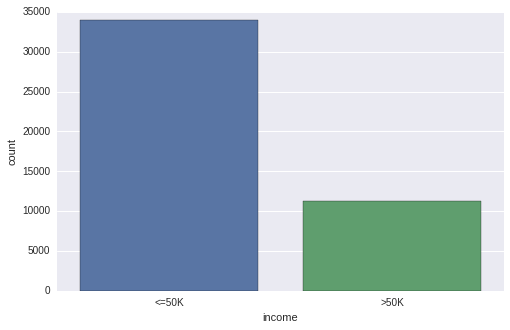

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
sns.countplot(x='income', data=data, ax=axes)

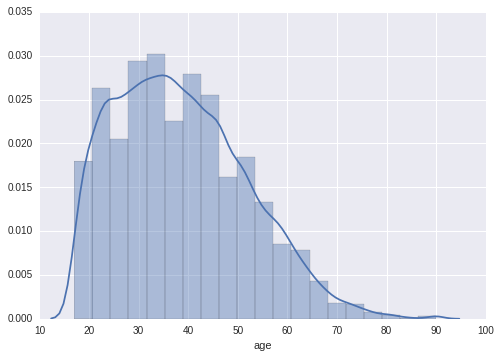

In [25]:
sns.distplot(data.age, bins=20, kde=True, axlabel='age')

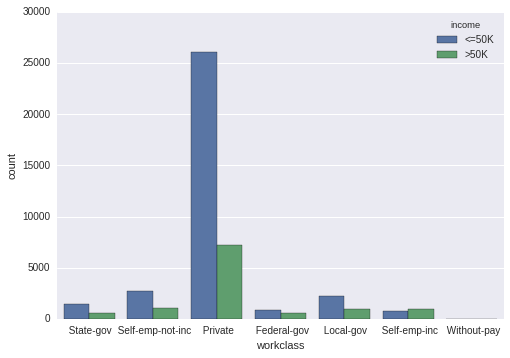

In [30]:
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
sns.countplot(x='workclass', hue='income', data=data)

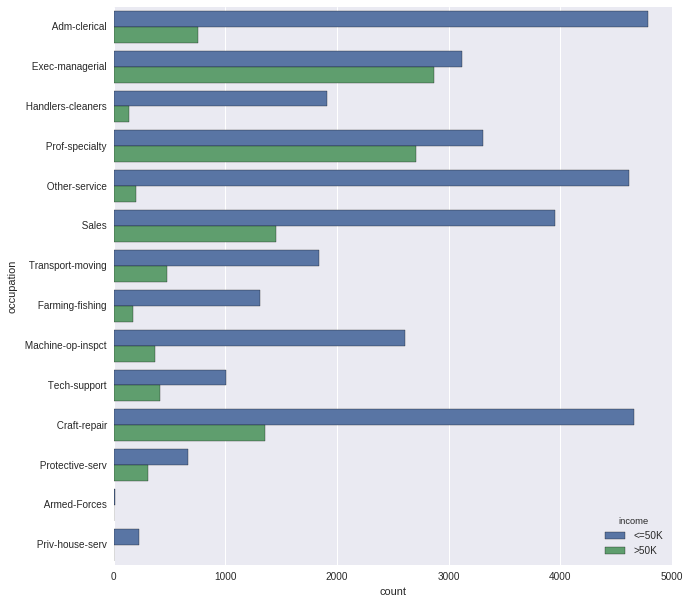

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.countplot(y='occupation', hue='income', data=data, ax=axes)

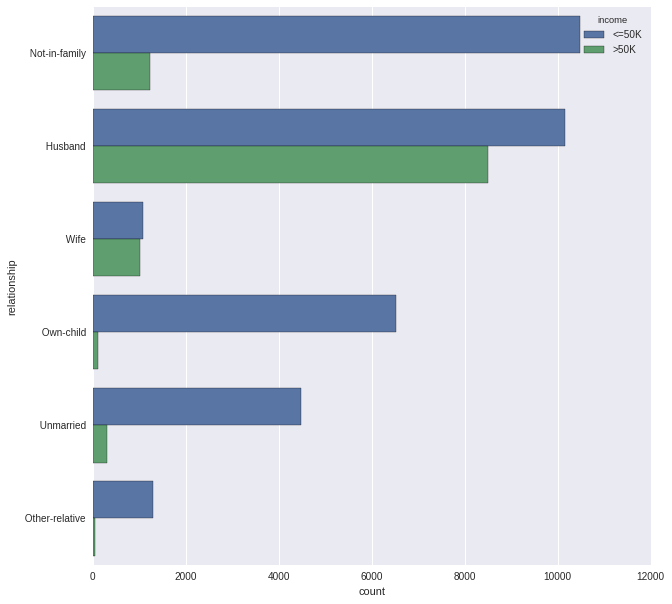

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.countplot(y='relationship', hue='income', data=data, ax=axes)

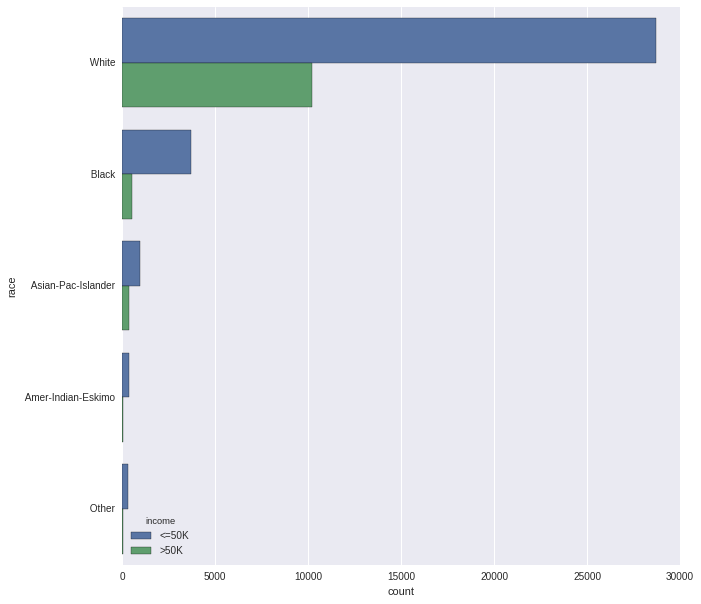

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.countplot(y='race', hue='income', data=data, ax=axes)

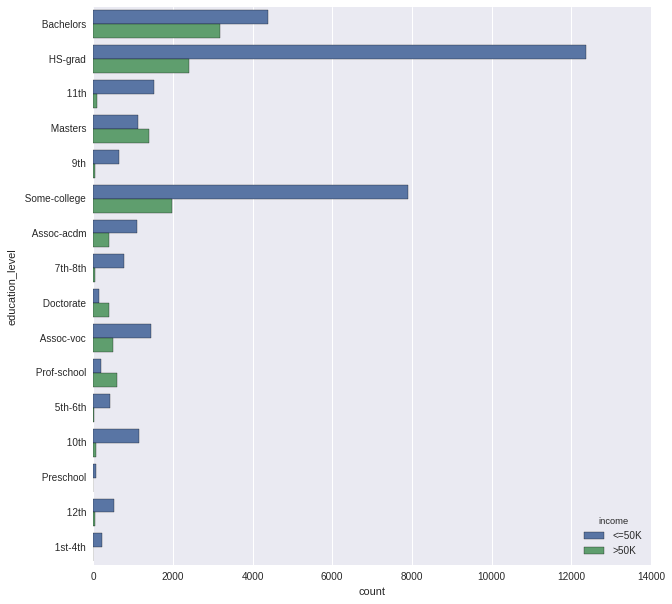

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.countplot(y='education_level', hue='income', data=data, ax=axes)

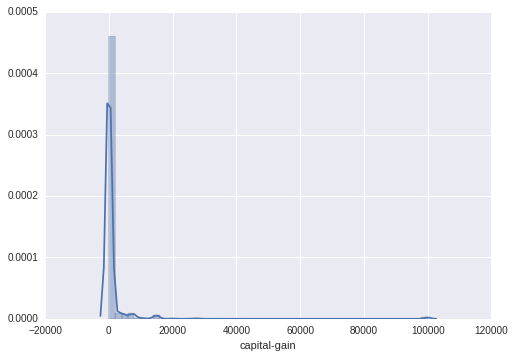

In [53]:
sns.distplot(data['capital-gain'], kde=True, axlabel='capital-gain')

In [63]:
data['capital-gain'].describe()

count    45222.000000
mean      1101.430344
std       7506.430084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

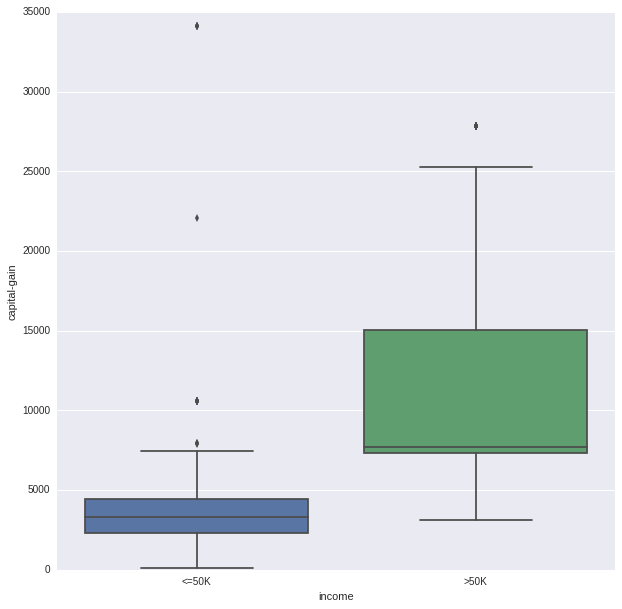

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

up_val=40000
low_val=0

data_select=data.loc[(data['capital-gain']<=up_val) & (data['capital-gain']>low_val) ]

sns.boxplot(x='income', y='capital-gain', data=data_select,ax=axes)

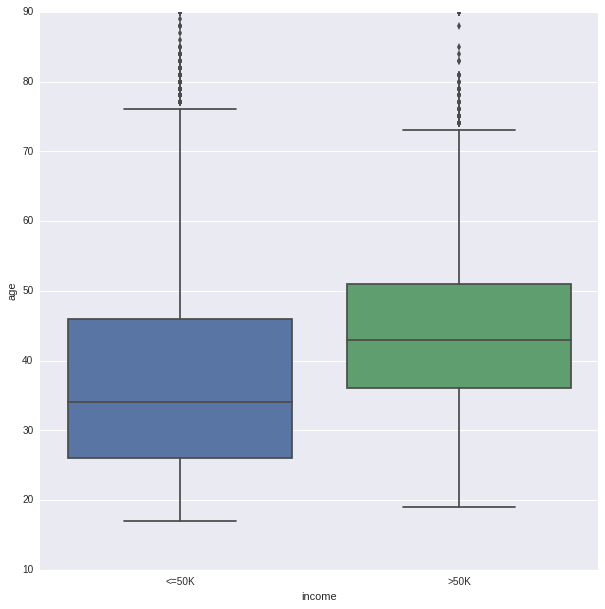

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

# up_val=40000
# low_val=0

# data_select=data.loc[(data['capital-gain']<=up_val) & (data['capital-gain']>low_val) ]

sns.boxplot(x='income', y='age', data=data,ax=axes)

In [64]:
data['capital-loss'].describe()

count    45222.000000
mean        88.595418
std        404.956092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

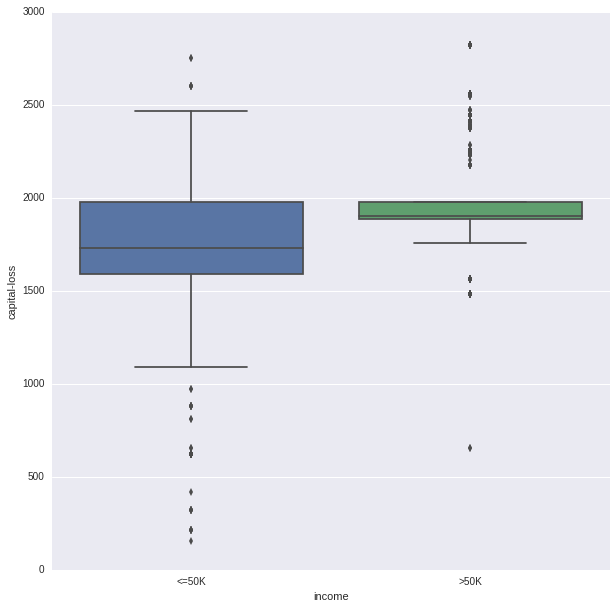

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

up_val=3000
low_val=0

data_select=data.loc[(data['capital-loss']<=up_val) & (data['capital-loss']>low_val) ]

sns.boxplot(x='income', y='capital-loss', data=data_select,ax=axes)

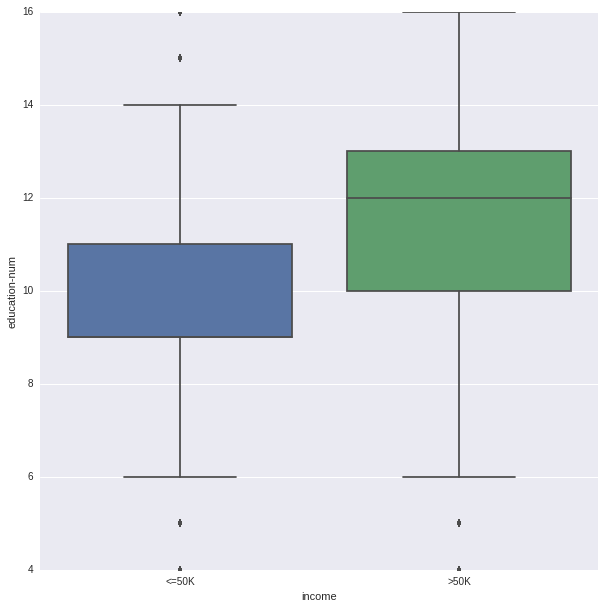

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

up_val=20
low_val=3

data_select=data.loc[(data['education-num']<=up_val) & (data['education-num']>low_val) ]

sns.boxplot(x='income', y='education-num', data=data_select,ax=axes)

In [68]:
data['hours-per-week'].describe()

count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

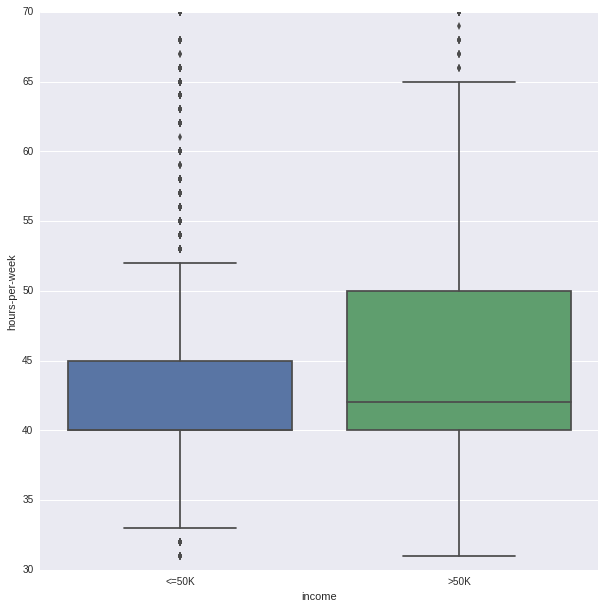

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
up_val=70
low_val=30
data_select=data.loc[(data['hours-per-week']<=up_val) & (data['hours-per-week']>low_val) ]

sns.boxplot(x='income', y='hours-per-week', data=data_select,ax=axes)

In [89]:
data_test=data[['workclass', 'education_level']].copy(deep=True)

In [92]:
pd.get_dummies(data_test).shape

(45222, 23)

In [93]:
income=data['income']

In [95]:
income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [96]:
income=income.apply(lambda x:0 if x=='<=50K'  else 1)

In [97]:
income.value_counts()

0    34014
1    11208
Name: income, dtype: int64